## Importing Libraries


In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix



In [66]:
# Load the dataset
data = pd.read_csv("predictive_maintenance.csv")


### Data Exploration and Insights

In [67]:
# Display the first few rows
data.head(10)


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,1/1/15,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,1/1/15,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,1/1/15,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,1/1/15,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,1/1/15,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [69]:
data.count()

date       124494
device     124494
failure    124494
metric1    124494
metric2    124494
metric3    124494
metric4    124494
metric5    124494
metric6    124494
metric7    124494
metric8    124494
metric9    124494
dtype: int64

In [70]:
data.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       558
metric3        47
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        65
dtype: int64

In [71]:
data.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [72]:
failure_counts = data["failure"].value_counts()
failure_percentages = failure_counts / len(data) * 100

# Print the results
print("Failure Counts:")
print(failure_counts)
print("\nFailure Percentages:")
print(failure_percentages)


Failure Counts:
0    124388
1       106
Name: failure, dtype: int64

Failure Percentages:
0    99.914855
1     0.085145
Name: failure, dtype: float64


In [73]:
# Filter the dataset for rows where failure = 1
failed_devices = data[data['failure'] == 1]

# Get the total number of unique devices that experienced failure
total_unique_failed_devices = failed_devices['device'].nunique()

print("Total unique failure devices:", total_unique_failed_devices)


Total unique failure devices: 106


In [74]:
# Generate summary statistics for numerical features
print(data.describe())


             failure       metric1        metric2        metric3  \
count  124494.000000  1.244940e+05  124494.000000  124494.000000   
mean        0.000851  1.223881e+08     159.484762       9.940455   
std         0.029167  7.045933e+07    2179.657730     185.747321   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000000  6.128476e+07       0.000000       0.000000   
50%         0.000000  1.227974e+08       0.000000       0.000000   
75%         0.000000  1.833096e+08       0.000000       0.000000   
max         1.000000  2.441405e+08   64968.000000   24929.000000   

             metric4        metric5        metric6        metric7  \
count  124494.000000  124494.000000  124494.000000  124494.000000   
mean        1.741120      14.222669  260172.657726       0.292528   
std        22.908507      15.943028   99151.078547       7.436924   
min         0.000000       1.000000       8.000000       0.000000   
25%         0.000000       8.000000  22145

The count for metric1 is the same as for the other metrics (124494), but it’s displayed in scientific notation (1.244940e+05) because of the large mean value that follows it in the table.

In [75]:
# Identify all duplicates (including the first occurrence)
duplicates = data.duplicated()

# Count the number of duplicates (excluding the first occurrence)
num_duplicates = duplicates.sum() - duplicates.head(1).sum()

print(f"Number of duplicate rows (excluding first occurrence): {num_duplicates}")

Number of duplicate rows (excluding first occurrence): 1


In [76]:
 
profile = ProfileReport(data, minimal=False)

# Generate and save the HTML report
profile.to_file("profile_report_full.html")



C:\Users\DELL\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Insights


- The dataset consists of **124,494** entries and **12** columns.
- Columns include 'date', 'device', 'failure', and numerical metrics from 'metric1' to 'metric9'.
- The data is clean there are **no missing values** since the count of non-null values for each column matches the total number of entries (124,494).
- 'date' and 'device' columns are of object data type, while other columns are of integer data type.
- It is **imbalanced data set**, as the failuer class is about **0.1%** of unfailure class. Here oversampling approach is used to deal with imbalanced dataset.

- **'date'** column has **304** unique values, indicating that the dataset spans over multiple days.
- There are total **1,169**  unique devices out of which total unique failure devices: **106**.
- Numerical metrics have varying numbers of unique values, suggesting differences in data distribution and variability across metrics.
- **metric7** and **metric8** seems to **exactly same**, so we can drop one of them
- metric 2,3,4,7,9 are **highly skewed.**

# Feature Engineering

- date exploration and visualization
- device come back to use
- Create feature called 'failure_before'

In [77]:
print("Start Date:", data['date'].min())
print("End Date:", data['date'].max())

Start Date: 1/1/15
End Date: 9/9/15


In [78]:
# 2. Convert data types
# Convert 'date' column to datetime data type
data['date'] = pd.to_datetime(data['date'])

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     124494 non-null  datetime64[ns]
 1   device   124494 non-null  object        
 2   failure  124494 non-null  int64         
 3   metric1  124494 non-null  int64         
 4   metric2  124494 non-null  int64         
 5   metric3  124494 non-null  int64         
 6   metric4  124494 non-null  int64         
 7   metric5  124494 non-null  int64         
 8   metric6  124494 non-null  int64         
 9   metric7  124494 non-null  int64         
 10  metric8  124494 non-null  int64         
 11  metric9  124494 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 11.4+ MB


In [80]:
data['month'] = data['date'].dt.month

In [81]:
data['weekday'] = data['date'].dt.dayofweek
data

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,weekday
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,11,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,11,0
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,11,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,11,0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     124494 non-null  datetime64[ns]
 1   device   124494 non-null  object        
 2   failure  124494 non-null  int64         
 3   metric1  124494 non-null  int64         
 4   metric2  124494 non-null  int64         
 5   metric3  124494 non-null  int64         
 6   metric4  124494 non-null  int64         
 7   metric5  124494 non-null  int64         
 8   metric6  124494 non-null  int64         
 9   metric7  124494 non-null  int64         
 10  metric8  124494 non-null  int64         
 11  metric9  124494 non-null  int64         
 12  month    124494 non-null  int64         
 13  weekday  124494 non-null  int64         
dtypes: datetime64[ns](1), int64(12), object(1)
memory usage: 13.3+ MB


In [83]:
data

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,weekday
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,11,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,11,0
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,11,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,11,0


In [84]:
data.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       558
metric3        47
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        65
month          11
weekday         7
dtype: int64

In [85]:
data['month'].value_counts()

1     25032
3     19833
2     19500
4     12012
5     11330
7     10531
6     10469
8      8346
9      4470
10     2940
11       31
Name: month, dtype: int64

In [86]:
data.groupby('month').agg({'device':lambda x: x.nunique()})

,device
month,
1,1164
2,726
3,685
4,491
5,424
6,353
7,346
8,334
9,184


<Axes: xlabel='month'>

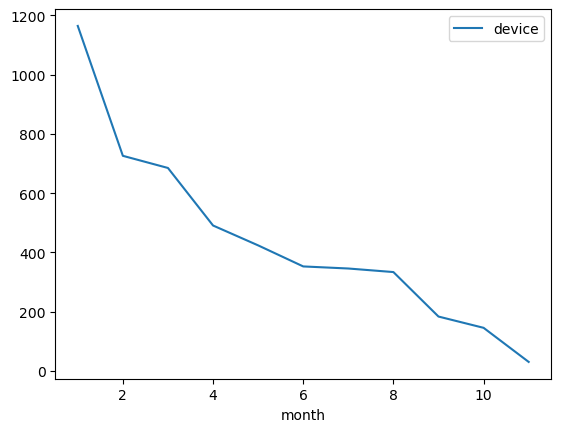

In [87]:
data.groupby('month').agg({'device':lambda x: x.nunique()}).plot()

In [88]:
data.groupby(data['date'].dt.month)['failure'].value_counts().unstack(fill_value=0)


failure,0,1
date,,
1,25008,24
2,19486,14
3,19824,9
4,12003,9
5,11309,21
6,10463,6
7,10515,16
8,8342,4
9,4470,0


In [89]:
# failure_counts_by_weekday
data.groupby('weekday')['failure'].value_counts().unstack(fill_value=0)


failure,0,1
weekday,,
0,17859,27
1,17516,18
2,17121,15
3,18119,22
4,18029,12
5,17889,8
6,17855,4


In [90]:
# max_date_per_device = 
data.groupby('device')['date'].max()

# print("Maximum date for each device:")
# print(max_date_per_device)


device
S1F01085   2015-01-06
S1F013BB   2015-05-11
S1F0166B   2015-01-06
S1F01E6Y   2015-02-17
S1F01JE0   2015-01-06
              ...    
Z1F1VMZB   2015-10-19
Z1F1VQFY   2015-06-30
Z1F26YZB   2015-03-25
Z1F282ZV   2015-03-25
Z1F2PBHX   2015-04-06
Name: date, Length: 1169, dtype: datetime64[ns]

In [91]:
data['max_date_per_device'] = data.groupby('device')['date'].transform('max')


In [92]:
data

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,weekday,max_date_per_device
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1,3,2015-01-06
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,3,2015-01-06
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,3,2015-02-17
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,3,2015-01-06
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,3,2015-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,11,0,2015-11-02
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,11,0,2015-11-02
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,11,0,2015-11-02
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,11,0,2015-11-02


In [93]:
data.count()

date                   124494
device                 124494
failure                124494
metric1                124494
metric2                124494
metric3                124494
metric4                124494
metric5                124494
metric6                124494
metric7                124494
metric8                124494
metric9                124494
month                  124494
weekday                124494
max_date_per_device    124494
dtype: int64

dff=df[(df.failure==1)&(df.date!=df.max_date)]

dff

Max date means the last day the device got checked. If the max day is ahead of failure date, it means this device returned to use after failed because got fixed.

 ### last recorded date of telemetry for each device

In [94]:
latest_dates = data.groupby('device')['date'].transform(max)
df1 = data[data['date'] == latest_dates].copy()


In [95]:
df1.shape

(1169, 15)

In [96]:
df1

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,weekday,max_date_per_device
3051,2015-01-03,W1F0WJFT,0,142903640,0,0,0,9,217819,0,0,1,1,5,2015-01-03
3516,2015-01-04,S1F04KSC,0,243217648,392,24929,529,3,339302,0,0,10137,1,6,2015-01-04
4673,2015-01-05,S1F03RV3,0,13723560,0,0,0,8,263330,0,0,0,1,0,2015-01-05
4685,2015-01-05,S1F05NAJ,0,201934440,392,0,0,4,341352,0,0,1,1,0,2015-01-05
4686,2015-01-05,S1F05P51,0,12164440,512,0,0,5,335898,0,0,0,1,0,2015-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,11,0,2015-11-02
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,11,0,2015-11-02
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,11,0,2015-11-02
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,11,0,2015-11-02


#### Create feature called 'failure_before'

If we just take the last record for the devices, we may lose information from those come back after failed ones


In [97]:
potential_fixed_devices = data[(data['failure'] == 1) & (data['date'] != data['max_date_per_device'])]
potential_fixed_devices


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,weekday,max_date_per_device
77958,2015-05-05,S1F136J0,1,131519808,0,0,25,16,343464,8,8,0,5,1,2015-05-06
79590,2015-05-09,W1F0KCP2,1,176861128,10392,0,121,6,310699,0,0,0,5,5,2015-05-11
79601,2015-05-09,W1F0M35B,1,141805096,0,0,1,7,267203,0,0,0,5,5,2015-05-11
101999,2015-07-12,S1F0GPFZ,1,236544080,0,0,0,9,264594,0,0,0,7,6,2015-07-24
104223,2015-07-18,W1F11ZG9,1,32671632,368,9,486,3,344433,0,0,1,7,5,2015-08-17


In [98]:
df1.loc[:, 'failure_before'] = 0


In [99]:
df1.loc[df1.device == 'S1F136J0','failure_before'] = 1
df1.loc[df1.device == 'W1F0KCP2','failure_before'] = 1
df1.loc[df1.device == 'W1F0M35B','failure_before'] = 1
df1.loc[df1.device == 'S1F0GPFZ','failure_before'] = 1
df1.loc[df1.device == 'W1F11ZG9','failure_before'] = 1

In [100]:
df1.head(10)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,weekday,max_date_per_device,failure_before
3051,2015-01-03,W1F0WJFT,0,142903640,0,0,0,9,217819,0,0,1,1,5,2015-01-03,0
3516,2015-01-04,S1F04KSC,0,243217648,392,24929,529,3,339302,0,0,10137,1,6,2015-01-04,0
4673,2015-01-05,S1F03RV3,0,13723560,0,0,0,8,263330,0,0,0,1,0,2015-01-05,0
4685,2015-01-05,S1F05NAJ,0,201934440,392,0,0,4,341352,0,0,1,1,0,2015-01-05,0
4686,2015-01-05,S1F05P51,0,12164440,512,0,0,5,335898,0,0,0,1,0,2015-01-05,0
4687,2015-01-05,S1F05P5Z,0,56574384,936,0,3,4,335893,0,0,0,1,0,2015-01-05,0
4692,2015-01-05,S1F08R94,0,16377144,0,1,0,4,330296,0,0,0,1,0,2015-01-05,0
4693,2015-01-05,S1F08S38,0,120628960,760,3,2,4,338658,0,0,6,1,0,2015-01-05,0
4695,2015-01-05,S1F09MAK,0,97346208,8392,0,7,3,306534,0,0,4,1,0,2015-01-05,0
4696,2015-01-05,S1F09MSM,0,234536728,360,0,0,3,343127,0,0,2,1,0,2015-01-05,0


## data transformation

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 3051 to 124493
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1169 non-null   datetime64[ns]
 1   device               1169 non-null   object        
 2   failure              1169 non-null   int64         
 3   metric1              1169 non-null   int64         
 4   metric2              1169 non-null   int64         
 5   metric3              1169 non-null   int64         
 6   metric4              1169 non-null   int64         
 7   metric5              1169 non-null   int64         
 8   metric6              1169 non-null   int64         
 9   metric7              1169 non-null   int64         
 10  metric8              1169 non-null   int64         
 11  metric9              1169 non-null   int64         
 12  month                1169 non-null   int64         
 13  weekday              1169 no

In [102]:
print(df1.describe())

           failure       metric1       metric2       metric3      metric4  \
count  1169.000000  1.169000e+03   1169.000000   1169.000000  1169.000000   
mean      0.086399  1.221612e+08    872.260051     31.243798     9.808383   
std       0.281072  7.040220e+07   5990.879345    738.252029    78.946049   
min       0.000000  0.000000e+00      0.000000      0.000000     0.000000   
25%       0.000000  5.972926e+07      0.000000      0.000000     0.000000   
50%       0.000000  1.222921e+08      0.000000      0.000000     0.000000   
75%       0.000000  1.826172e+08      0.000000      0.000000     0.000000   
max       1.000000  2.433294e+08  64792.000000  24929.000000  1666.000000   

           metric5        metric6      metric7      metric8       metric9  \
count  1169.000000    1169.000000  1169.000000  1169.000000   1169.000000   
mean     12.444825  269958.996578     4.443114     4.443114     49.230967   
std      12.366156  104615.250090    43.725859    43.725859    678.117966  

In [103]:
failure_counts = df1["failure"].value_counts()
failure_percentages = failure_counts / len(data) * 100

# Print the results
print("Failure Counts:")
print(failure_counts)
print("\nFailure Percentages:")
print(failure_percentages)


Failure Counts:
0    1068
1     101
Name: failure, dtype: int64

Failure Percentages:
0    0.857873
1    0.081128
Name: failure, dtype: float64


In [104]:
df1.device

3051      W1F0WJFT
3516      S1F04KSC
4673      S1F03RV3
4685      S1F05NAJ
4686      S1F05P51
            ...   
124489    Z1F0MA1S
124490    Z1F0Q8RT
124491    Z1F0QK05
124492    Z1F0QL3N
124493    Z1F0QLC1
Name: device, Length: 1169, dtype: object

In [105]:
Id = df1.device.values.tolist()

In [106]:
#change device id values to the first four characters
Id1 = [] 
for i in Id:
    i = i[:4]
    Id1.append(i)

df1.device=Id1

df1.device.value_counts()

S1F0    391
W1F0    282
Z1F0    149
S1F1    139
W1F1    138
Z1F1     67
Z1F2      3
Name: device, dtype: int64

In [107]:
dev=pd.crosstab(df1['device'],df1['failure']) 

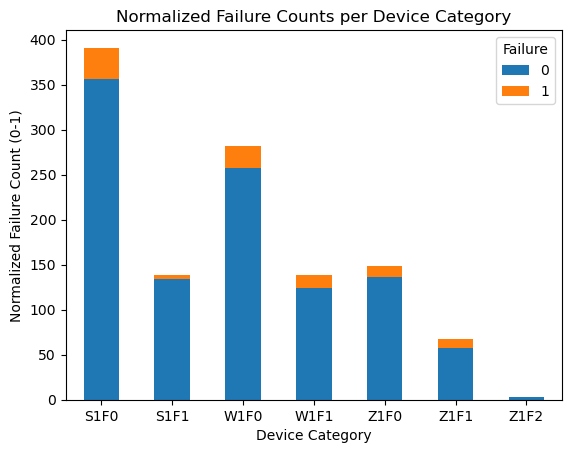

In [108]:
# Create the plot
dev.plot(kind="bar", stacked=True)

# Customize the plot (optional)
plt.xlabel('Device Category')
plt.ylabel('Normalized Failure Count (0-1)')
plt.title('Normalized Failure Counts per Device Category')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Failure')  # Add legend with title 'Failure'

# Show the plot
plt.show()

In [109]:
df1.nunique()

date                    104
device                    7
failure                   2
metric1                1168
metric2                 118
metric3                  44
metric4                  67
metric5                  58
metric6                1135
metric7                  22
metric8                  22
metric9                  63
month                    11
weekday                   7
max_date_per_device     104
failure_before            2
dtype: int64

- droping unimportant and redundant data
- data transformation 
- standardisation

as we have seen earlier that metrics7 and metric8 is highly correlated so we have to drop one of them

In [110]:
(df1['metric7']==df1['metric8']).value_counts()

True    1169
dtype: int64

In [111]:
df1.drop('metric8',axis=1,inplace=True)

In [112]:
df1.drop(['date','max_date_per_device'],axis=1,inplace=True)

In [113]:
df1.head()

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,month,weekday,failure_before
3051,W1F0,0,142903640,0,0,0,9,217819,0,1,1,5,0
3516,S1F0,0,243217648,392,24929,529,3,339302,0,10137,1,6,0
4673,S1F0,0,13723560,0,0,0,8,263330,0,0,1,0,0
4685,S1F0,0,201934440,392,0,0,4,341352,0,1,1,0,0
4686,S1F0,0,12164440,512,0,0,5,335898,0,0,1,0,0


In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 3051 to 124493
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   device          1169 non-null   object
 1   failure         1169 non-null   int64 
 2   metric1         1169 non-null   int64 
 3   metric2         1169 non-null   int64 
 4   metric3         1169 non-null   int64 
 5   metric4         1169 non-null   int64 
 6   metric5         1169 non-null   int64 
 7   metric6         1169 non-null   int64 
 8   metric7         1169 non-null   int64 
 9   metric9         1169 non-null   int64 
 10  month           1169 non-null   int64 
 11  weekday         1169 non-null   int64 
 12  failure_before  1169 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 127.9+ KB


In [115]:
for col in ['month','weekday']:
    df1[col]=df1[col].astype('object')

In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 3051 to 124493
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   device          1169 non-null   object
 1   failure         1169 non-null   int64 
 2   metric1         1169 non-null   int64 
 3   metric2         1169 non-null   int64 
 4   metric3         1169 non-null   int64 
 5   metric4         1169 non-null   int64 
 6   metric5         1169 non-null   int64 
 7   metric6         1169 non-null   int64 
 8   metric7         1169 non-null   int64 
 9   metric9         1169 non-null   int64 
 10  month           1169 non-null   object
 11  weekday         1169 non-null   object
 12  failure_before  1169 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 127.9+ KB


## Getting dummy

In [117]:
# Convert categorical variables into dummy variables
df1 = pd.get_dummies(df1, drop_first=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_19192\842490473.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1 = pd.get_dummies(df1, drop_first=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_19192\842490473.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1 = pd.get_dummies(df1, drop_first=True)


In [118]:
df1

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,failure_before,...,month_8,month_9,month_10,month_11,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
3051,0,142903640,0,0,0,9,217819,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3516,0,243217648,392,24929,529,3,339302,0,10137,0,...,0,0,0,0,0,0,0,0,0,1
4673,0,13723560,0,0,0,8,263330,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4685,0,201934440,392,0,0,4,341352,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4686,0,12164440,512,0,0,5,335898,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0,18310224,0,0,0,10,353705,8,0,0,...,0,0,0,1,0,0,0,0,0,0
124490,0,172556680,96,107,4,11,332792,0,13,0,...,0,0,0,1,0,0,0,0,0,0
124491,0,19029120,4832,0,0,11,350410,0,0,0,...,0,0,0,1,0,0,0,0,0,0
124492,0,226953408,0,0,0,12,358980,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Feature Scaling Or Standardization 

In [119]:
# Separate dependent (y) and independent features (X)
X = df1.drop('failure', axis=1)
y = df1['failure']


In [120]:
y

3051      0
3516      0
4673      0
4685      0
4686      0
         ..
124489    0
124490    0
124491    0
124492    0
124493    0
Name: failure, Length: 1169, dtype: int64

In [121]:
# Select only numeric columns for metrics 1, 2, 3, 4, 5, 6, 7, and 9
numeric_cols = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric9']


In [122]:
# Store a copy of X before scaling
X_before_scaling = X.copy()

# Apply StandardScaler only to selected numeric columns
scaler = StandardScaler()
X.loc[:, numeric_cols] = scaler.fit_transform(X.loc[:, numeric_cols])


In [123]:
X

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,failure_before,device_S1F1,...,month_8,month_9,month_10,month_11,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
3051,0.294754,-0.145660,-0.042339,-0.124295,-0.278688,-0.498611,-0.101656,-0.071155,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,1.720234,-0.080200,33.739714,6.579352,-0.764091,0.663122,-0.101656,14.882494,0,0,...,0,0,0,0,0,0,0,0,0,1
4673,-1.540918,-0.145660,-0.042339,-0.124295,-0.359588,-0.063393,-0.101656,-0.072630,0,0,...,0,0,0,0,0,0,0,0,0,0
4685,1.133592,-0.080200,-0.042339,-0.124295,-0.683190,0.682726,-0.101656,-0.071155,0,0,...,0,0,0,0,0,0,0,0,0,0
4686,-1.563074,-0.060160,-0.042339,-0.124295,-0.602290,0.630570,-0.101656,-0.072630,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,-1.475741,-0.145660,-0.042339,-0.124295,-0.197787,0.800857,0.081380,-0.072630,0,0,...,0,0,0,1,0,0,0,0,0,0
124490,0.716129,-0.129629,0.102660,-0.073606,-0.116887,0.600867,-0.101656,-0.053452,0,0,...,0,0,0,1,0,0,0,0,0,0
124491,-1.465526,0.661244,-0.042339,-0.124295,-0.116887,0.769347,-0.101656,-0.072630,0,0,...,0,0,0,1,0,0,0,0,0,0
124492,1.489116,-0.145660,-0.042339,-0.124295,-0.035987,0.851301,-0.101656,-0.072630,0,0,...,0,0,0,1,0,0,0,0,0,0


In [124]:
X_before_scaling

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,failure_before,device_S1F1,...,month_8,month_9,month_10,month_11,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
3051,142903640,0,0,0,9,217819,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,243217648,392,24929,529,3,339302,0,10137,0,0,...,0,0,0,0,0,0,0,0,0,1
4673,13723560,0,0,0,8,263330,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4685,201934440,392,0,0,4,341352,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4686,12164440,512,0,0,5,335898,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,18310224,0,0,0,10,353705,8,0,0,0,...,0,0,0,1,0,0,0,0,0,0
124490,172556680,96,107,4,11,332792,0,13,0,0,...,0,0,0,1,0,0,0,0,0,0
124491,19029120,4832,0,0,11,350410,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
124492,226953408,0,0,0,12,358980,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Box Plots To understand Effect Of Standard Scaler

C:\Users\DELL\AppData\Local\Temp\ipykernel_19192\294943947.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


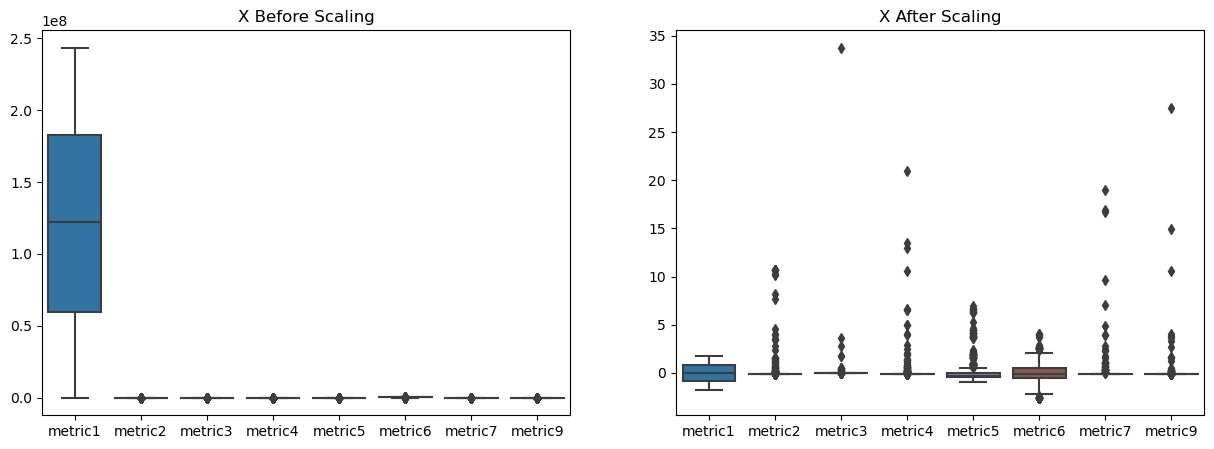

In [125]:
# Plot boxplots to visualize the changes
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_before_scaling[numeric_cols])
plt.title('X Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X[numeric_cols])
plt.title('X After Scaling')
plt.show()

## feature selection

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, 

In [126]:
# Instantiate ExtraTreesClassifier
model = ExtraTreesClassifier()

# Fit the model to your data
model.fit(X, y)

# Display feature importances
print("Feature Importances:")
print(model.feature_importances_)

Feature Importances:
[0.04163597 0.05938838 0.00864888 0.07642054 0.07252477 0.06087038
 0.10889378 0.02096554 0.00633228 0.00481459 0.01237736 0.01351884
 0.01088021 0.00947169 0.00013234 0.0448647  0.02452234 0.01845368
 0.03754756 0.04368679 0.10247915 0.02006606 0.00325362 0.01049451
 0.00347076 0.06582596 0.03114709 0.03817949 0.02367421 0.01796421
 0.00749431]


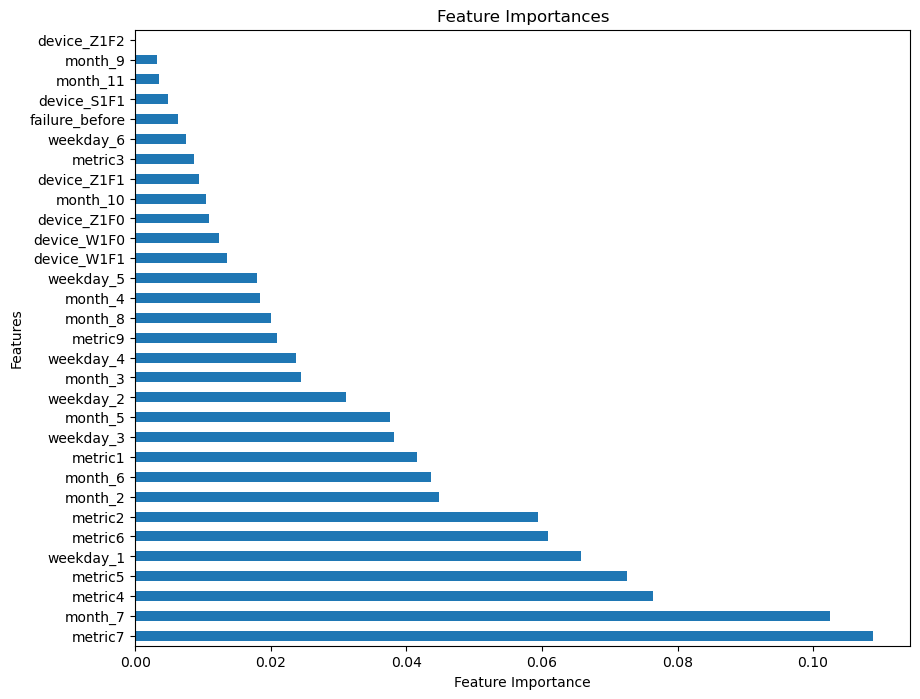

In [127]:
# Plot graph of feature importances for better visualization
plt.figure(figsize=(10, 8))  
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [128]:
# Set threshold value for selecting important features
threshold = 0.005  # Adjust this value as needed

# Select only important features based on the threshold
important_features = feat_importances[feat_importances > threshold].index.tolist()

# Filter the original feature set X to include only the important features
X_selected = X[important_features]

In [129]:
X_selected

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,failure_before,device_W1F0,...,month_6,month_7,month_8,month_10,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
3051,0.294754,-0.145660,-0.042339,-0.124295,-0.278688,-0.498611,-0.101656,-0.071155,0,1,...,0,0,0,0,0,0,0,0,1,0
3516,1.720234,-0.080200,33.739714,6.579352,-0.764091,0.663122,-0.101656,14.882494,0,0,...,0,0,0,0,0,0,0,0,0,1
4673,-1.540918,-0.145660,-0.042339,-0.124295,-0.359588,-0.063393,-0.101656,-0.072630,0,0,...,0,0,0,0,0,0,0,0,0,0
4685,1.133592,-0.080200,-0.042339,-0.124295,-0.683190,0.682726,-0.101656,-0.071155,0,0,...,0,0,0,0,0,0,0,0,0,0
4686,-1.563074,-0.060160,-0.042339,-0.124295,-0.602290,0.630570,-0.101656,-0.072630,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,-1.475741,-0.145660,-0.042339,-0.124295,-0.197787,0.800857,0.081380,-0.072630,0,0,...,0,0,0,0,0,0,0,0,0,0
124490,0.716129,-0.129629,0.102660,-0.073606,-0.116887,0.600867,-0.101656,-0.053452,0,0,...,0,0,0,0,0,0,0,0,0,0
124491,-1.465526,0.661244,-0.042339,-0.124295,-0.116887,0.769347,-0.101656,-0.072630,0,0,...,0,0,0,0,0,0,0,0,0,0
124492,1.489116,-0.145660,-0.042339,-0.124295,-0.035987,0.851301,-0.101656,-0.072630,0,0,...,0,0,0,0,0,0,0,0,0,0


after selecting only important features preformance of model degrades so i select all the features


## Model Training

In [130]:
# Train Test Split using the selected important features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [131]:
X_train.shape,X_test.shape

((876, 31), (293, 31))

In [132]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

# Loop through each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions on training and test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Print model name
    print(model_name)
    print("=" * len(model_name))
    
    # Training set performance
    print("Training Set Performance:")
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Precision:", precision_score(y_train, y_train_pred))
    print("Recall:", recall_score(y_train, y_train_pred))
    print("F1-score:", f1_score(y_train, y_train_pred))
   
    print("\n")
    
    # Test set performance
    print("Test Set Performance:")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred))
    print("Recall:", recall_score(y_test, y_test_pred))
    print("F1-score:", f1_score(y_test, y_test_pred))
    print("\n")

Logistic Regression
Training Set Performance:
Accuracy: 0.934931506849315
Precision: 0.8666666666666667
Recall: 0.3291139240506329
F1-score: 0.47706422018348627


Test Set Performance:
Accuracy: 0.9419795221843004
Precision: 0.8571428571428571
Recall: 0.2727272727272727
F1-score: 0.41379310344827586


Random Forest
Training Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Test Set Performance:
Accuracy: 0.9590443686006825
Precision: 0.9166666666666666
Recall: 0.5
F1-score: 0.6470588235294118


XGBoost
Training Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Test Set Performance:
Accuracy: 0.9488054607508533
Precision: 0.7692307692307693
Recall: 0.45454545454545453
F1-score: 0.5714285714285714




In [133]:
from sklearn.metrics import classification_report

def evaluate_models(X_train, y_train, X_test, y_test):
    # Define the models
    logistic_model = LogisticRegression(random_state=42)
    random_forest_model = RandomForestClassifier(random_state=42)
    xgb_model = xgb.XGBClassifier(random_state=42)

    # Train the models
    logistic_model.fit(X_train, y_train)
    random_forest_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)

    # Define a dictionary of models
    models = {
        "Logistic Regression": logistic_model,
        "Random Forest": random_forest_model,
        "XGBoost": xgb_model
    }
    
    # Loop through each model
    for model_name, model in models.items():
        # Make predictions
        predictions = model.predict(X_test)

        # Calculate TP, FN, FP, TN
        TP = sum((predictions == 1) & (y_test == 1))
        FN = sum((predictions == 0) & (y_test == 1))
        FP = sum((predictions == 1) & (y_test == 0))
        TN = sum((predictions == 0) & (y_test == 0))

        # Print model name
        print(model_name)
        print("=" * len(model_name))

        # Print classification report
        print("Classification Report:")
        print(classification_report(y_test, predictions))

        # Print TP, FN, FP, TN
        print('TP:', TP)
        print('FN:', FN)
        print('FP:', FP)
        print('TN:', TN)

        print("\n\n")



In [134]:
evaluate_models(X_train, y_train, X_test, y_test)



Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       271
           1       0.86      0.27      0.41        22

    accuracy                           0.94       293
   macro avg       0.90      0.63      0.69       293
weighted avg       0.94      0.94      0.93       293

TP: 6
FN: 16
FP: 1
TN: 270



Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       271
           1       0.91      0.45      0.61        22

    accuracy                           0.96       293
   macro avg       0.93      0.73      0.79       293
weighted avg       0.95      0.96      0.95       293

TP: 10
FN: 12
FP: 1
TN: 270



XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       271
           1       0.77      0.45      0.57        22

    accura

In [135]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(models, X_test, y_test):
    """
    Plot ROC curve for each model.

    Parameters:
    - models (dict): A dictionary containing model names as keys and trained models as values.
    - X_test (DataFrame or array-like): Test features.
    - y_test (Series or array-like): True labels for the test data.
    """
    plt.figure(figsize=(8, 6))
    for model_name, model in models.items():
        # Make predictions
        predictions = model.predict_proba(X_test)[:, 1]
        
        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, predictions)
        
        # Compute AUC score
        auc_score = roc_auc_score(y_test, predictions)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

    # Plot ROC curve for random guessing (baseline)
    plt.plot([0, 1], [0, 1], linestyle="--", color="grey", label="Random Guessing")

    # Add labels and legend
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.grid(True)
    plt.show()



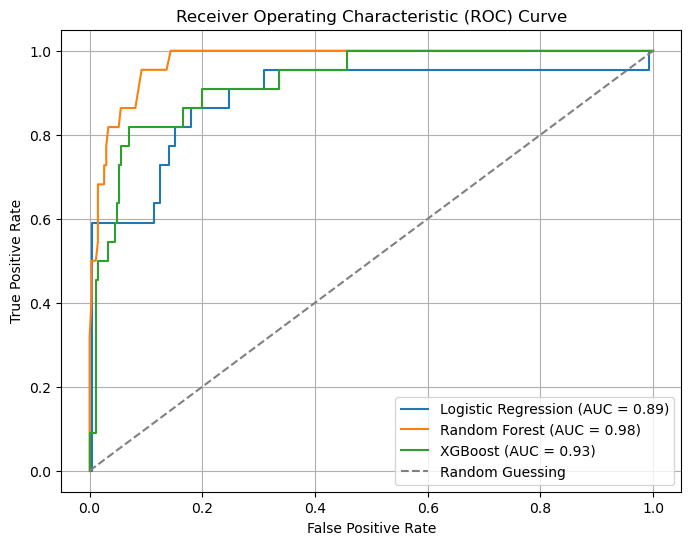

In [136]:
plot_roc_curve(models, X_test, y_test)


In [137]:
failure_counts = df1["failure"].value_counts()
failure_percentages = failure_counts / len(data) * 100

# Print the results
print("Failure Counts:")
print(failure_counts)
print("\nFailure Percentages:")
print(failure_percentages)


Failure Counts:
0    1068
1     101
Name: failure, dtype: int64

Failure Percentages:
0    0.857873
1    0.081128
Name: failure, dtype: float64


## handling imbalanced dataset
when encounter with imbalanced dataset, we always re-sample the data in order to mitigate the effect caused by class imbalance.

### Using under sampling

In [138]:
from imblearn.under_sampling import RandomUnderSampler

# Define RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Undersample the majority class
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)


In [139]:
X_resampled.shape

(158, 31)

In [140]:
# Call evaluate_models function
evaluate_models(X_resampled, y_resampled, X_test, y_test)

Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       271
           1       0.28      0.82      0.41        22

    accuracy                           0.83       293
   macro avg       0.63      0.82      0.66       293
weighted avg       0.93      0.83      0.86       293

TP: 18
FN: 4
FP: 47
TN: 224



Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       271
           1       0.38      0.82      0.51        22

    accuracy                           0.88       293
   macro avg       0.68      0.85      0.72       293
weighted avg       0.94      0.88      0.90       293

TP: 18
FN: 4
FP: 30
TN: 241



XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       271
           1       0.25      0.82      0.38        22

    accur

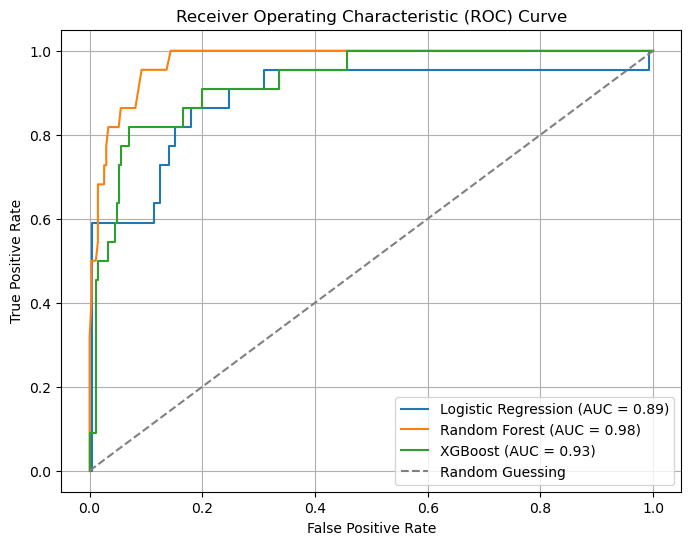

In [141]:
plot_roc_curve(models, X_test, y_test)


### Using SMOTE
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [142]:
from imblearn.over_sampling import SMOTE

In [143]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [144]:
# Check the class distribution after resampling
print("After SMOTE:")
print(y_resampled.value_counts())

After SMOTE:
0    1068
1    1068
Name: failure, dtype: int64


In [145]:
# Split the resampled data into train and test sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)


In [146]:
X_train_resampled.shape, X_test_resampled.shape

((1602, 31), (534, 31))

In [147]:
evaluate_models(X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled)


Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       274
           1       0.86      0.92      0.89       260

    accuracy                           0.89       534
   macro avg       0.89      0.89      0.89       534
weighted avg       0.89      0.89      0.89       534

TP: 240
FN: 20
FP: 39
TN: 235



Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       274
           1       0.97      0.97      0.97       260

    accuracy                           0.97       534
   macro avg       0.97      0.97      0.97       534
weighted avg       0.97      0.97      0.97       534

TP: 252
FN: 8
FP: 9
TN: 265



XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       274
           1       0.95      0.98      0.97       260

    acc

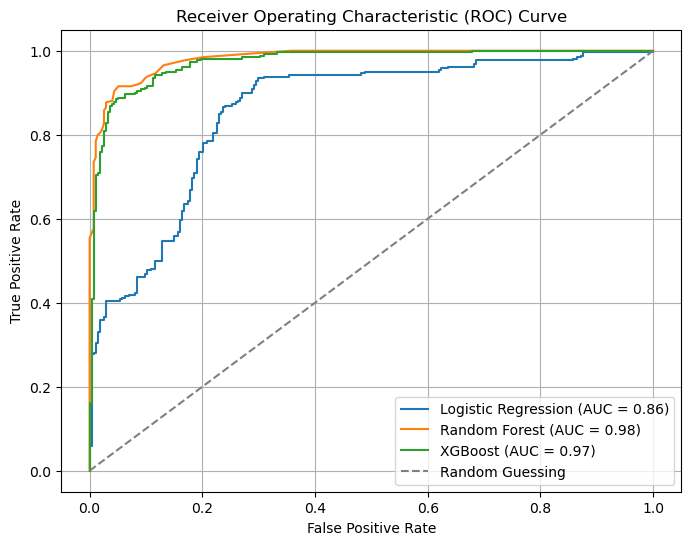

In [148]:
plot_roc_curve(models, X_test_resampled, y_test_resampled)


## Applying hyperparameter tunning on random forest

In [149]:
from sklearn.model_selection import GridSearchCV

def tune_random_forest(X_train, y_train):
    # Define the parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }

    # Instantiate the RandomForestClassifier
    rf = RandomForestClassifier()

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    # Fit GridSearchCV to the data
    grid_search.fit(X_train, y_train)

    # Print the best parameters found
    print("Best parameters found:")
    print(grid_search.best_params_)

    # Return the best estimator
    return grid_search.best_estimator_



In [150]:
 best_rf_model = tune_random_forest(X_train_resampled, y_train_resampled)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [152]:
def evaluate_tuned_model(model, X_test, y_test):
    # Make predictions
    predictions = model.predict(X_test)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, predictions))

    # Calculate TP, FN, FP, TN
    TP = sum((predictions == 1) & (y_test == 1))
    FN = sum((predictions == 0) & (y_test == 1))
    FP = sum((predictions == 1) & (y_test == 0))
    TN = sum((predictions == 0) & (y_test == 0))

    # Print TP, FN, FP, TN
    print('TP:', TP)
    print('FN:', FN)
    print('FP:', FP)
    print('TN:', TN)



In [153]:
evaluate_tuned_model(best_rf_model, X_test_resampled, y_test_resampled)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       274
           1       0.96      0.98      0.97       260

    accuracy                           0.97       534
   macro avg       0.97      0.97      0.97       534
weighted avg       0.97      0.97      0.97       534

TP: 256
FN: 4
FP: 11
TN: 263


### Applying hyperparameter tunning on xgboost


In [111]:
from sklearn.model_selection import GridSearchCV

def tune_xgboost(X_train, y_train):
    # Define the parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7, 0.9],
        'colsample_bytree': [0.5, 0.7, 0.9]
    }

    # Instantiate the XGBClassifier
    xgb_model = xgb.XGBClassifier()

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    # Fit GridSearchCV to the data
    grid_search.fit(X_train, y_train)

    # Print the best parameters found
    print("Best parameters found:")
    print(grid_search.best_params_)

    # Return the best estimator
    return grid_search.best_estimator_



In [112]:
best_xgb_model = tune_xgboost(X_train_resampled, y_train_resampled)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found:
{'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}


In [113]:
evaluate_tuned_model(best_xgb_model, X_test_resampled, y_test_resampled)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       274
           1       0.95      0.98      0.97       260

    accuracy                           0.97       534
   macro avg       0.97      0.97      0.97       534
weighted avg       0.97      0.97      0.97       534

TP: 255
FN: 5
FP: 13
TN: 261
